In [1]:
import requests
import numpy as np
r = requests.get('http://ai.stanford.edu/~jkrause/car196/cars_train.tgz').content
name = "data.tgz"
open(name, 'wb').write(r)
import tarfile
tar = tarfile.open(name, "r:gz")
print(tar.getnames())
tar.extractall()

['cars_train', 'cars_train/00001.jpg', 'cars_train/00002.jpg', 'cars_train/00003.jpg', 'cars_train/00004.jpg', 'cars_train/00005.jpg', 'cars_train/00006.jpg', 'cars_train/00007.jpg', 'cars_train/00008.jpg', 'cars_train/00009.jpg', 'cars_train/00010.jpg', 'cars_train/00011.jpg', 'cars_train/00012.jpg', 'cars_train/00013.jpg', 'cars_train/00014.jpg', 'cars_train/00015.jpg', 'cars_train/00016.jpg', 'cars_train/00017.jpg', 'cars_train/00018.jpg', 'cars_train/00019.jpg', 'cars_train/00020.jpg', 'cars_train/00021.jpg', 'cars_train/00022.jpg', 'cars_train/00023.jpg', 'cars_train/00024.jpg', 'cars_train/00025.jpg', 'cars_train/00026.jpg', 'cars_train/00027.jpg', 'cars_train/00028.jpg', 'cars_train/00029.jpg', 'cars_train/00030.jpg', 'cars_train/00031.jpg', 'cars_train/00032.jpg', 'cars_train/00033.jpg', 'cars_train/00034.jpg', 'cars_train/00035.jpg', 'cars_train/00036.jpg', 'cars_train/00037.jpg', 'cars_train/00038.jpg', 'cars_train/00039.jpg', 'cars_train/00040.jpg', 'cars_train/00041.jpg', '

In [2]:
path = '/content'

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential

In [4]:
data_gen = ImageDataGenerator(rescale=1./255)
x = 128
y = 128
data_gen = data_gen.flow_from_directory(path, target_size=(x,y), batch_size=1, class_mode=None, shuffle=True)

Found 8294 images belonging to 4 classes.


In [5]:
import os
len(os.listdir('cars_train'))

8144

In [6]:
from skimage.color import rgb2gray
Y = []
X = []
for i in range(len(data_gen)):
  for image in data_gen[i]:
    X.append(rgb2gray(image))
    Y.append(image)

del data_gen

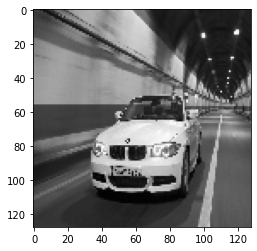

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[10].reshape(x,y), cmap='gray')

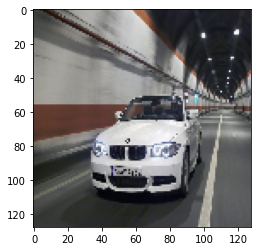

In [8]:
plt.imshow(Y[10])

In [9]:
import numpy as np
X = np.array(X)
X = X.reshape(-1,x,y,1)
Y = np.array(Y)

In [10]:
X.shape, Y.shape

((8294, 128, 128, 1), (8294, 128, 128, 3))

In [11]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', strides=2, input_shape=X.shape[1:]))
model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same', strides=2))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same', strides=2))
model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))

In [12]:
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (4,4), activation = 'relu', padding = 'same'))
from tensorflow import keras

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 512)       295424    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       1179904   
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 512)       2

In [14]:
# opt = keras.optimizers.Adam(learning_rate=0.00005)
# model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
# model.fit(X,Y,validation_split=.1,epochs=45,batch_size=1)
# model.save('/content/drive/MyDrive/Colab Notebooks/AE/Colorization/my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/AE/Colorization/my_model.h5')

In [15]:
preds = model.predict(X)

In [16]:
def pic(i):
  ax = plt.subplot(1,3,1)
  ax.imshow(preds[i]/preds[i].max())
  ax.title.set_text('Colorized image');
  ax.axis('off')
  ax = plt.subplot(1,3,2)
  plt.imshow(X[i].reshape(x,y), cmap='gray')
  ax.title.set_text('Gray image');
  ax.axis('off')
  ax = plt.subplot(1,3,3)
  ax.imshow(Y[i])
  ax.title.set_text('Main image')
  ax.axis('off')
  plt.show();

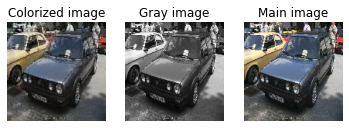

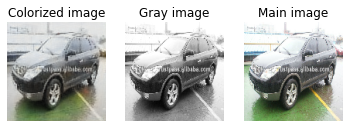

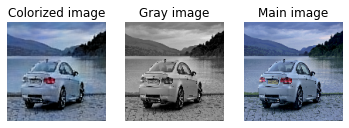

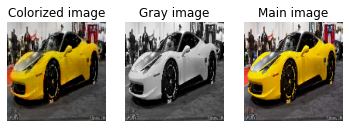

In [17]:
tis = [4,3,-2,-1]
for i in tis:
  pic(i)